# clasificacion de flores iris

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris =datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data[:, :2]
Y = iris.target

In [4]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]

In [5]:
C = 1.0
SVC =svm.SVC(kernel= "linear", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred=SVC.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'cpam'
  


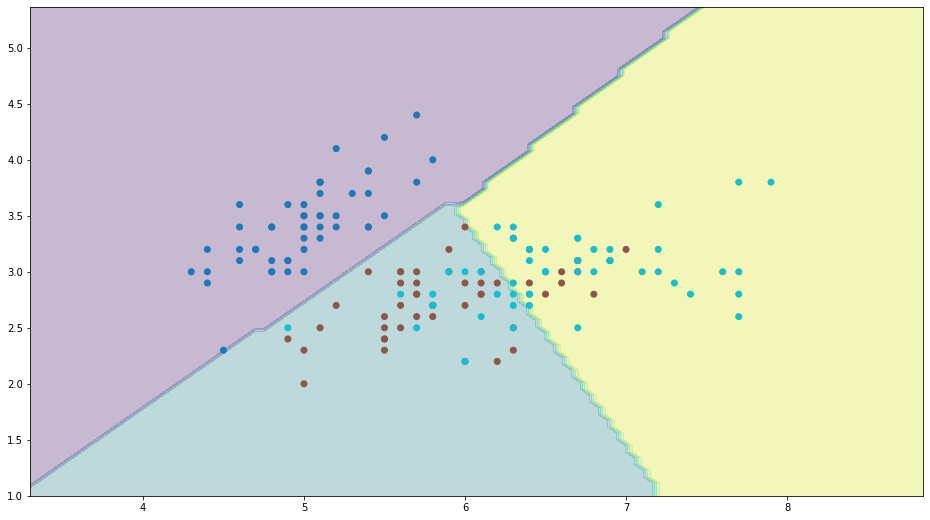

In [6]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cpam=plt.cm.tab10,alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap =plt.cm.tab10)


In [7]:
C = 1.0
SVC =svm.SVC(kernel= "rbf", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred=SVC.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'cpam'
  


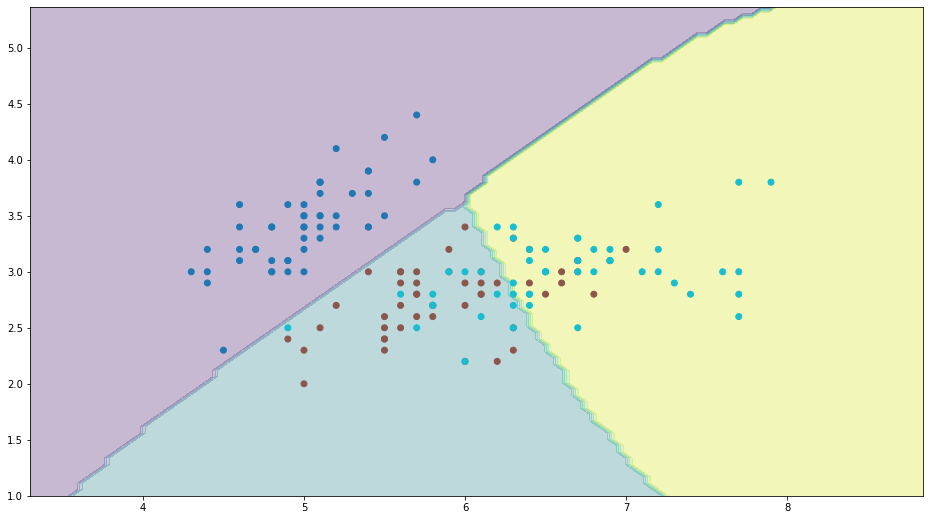

In [8]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cpam=plt.cm.tab10,alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap =plt.cm.tab10)

In [9]:
C = 1.0
SVC =svm.SVC(kernel= "poly", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred=SVC.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'cpam'
  


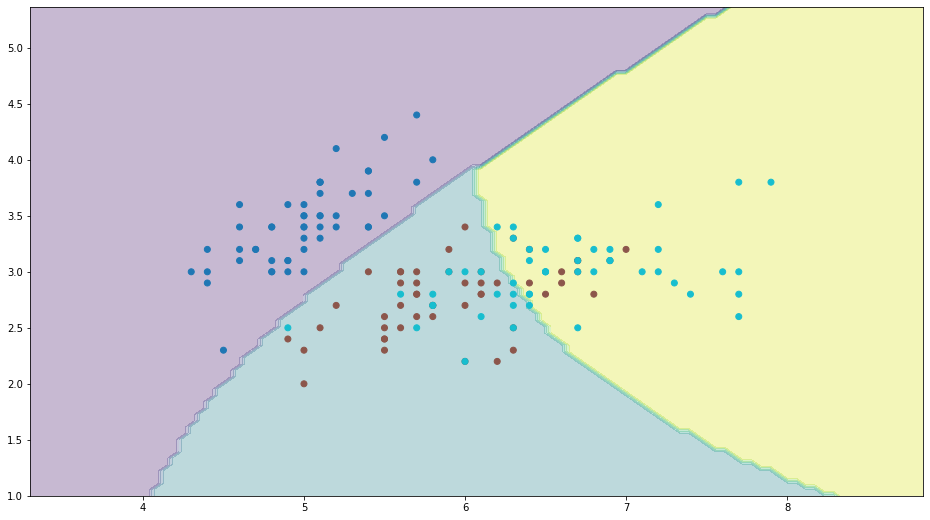

In [10]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cpam=plt.cm.tab10,alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap =plt.cm.tab10)

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [13]:
X, Y = shuffle(X,Y, random_state= 0)

In [14]:
X_train,X_test, y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [15]:
parameters = [
    {
        "kernel":["rbf"],
        "gamma" :[1e-4,1e-3,1e-2,0.1,0.2,0.5],
        "C"     :[1,10,100,1000]
    }
]

In [17]:
clf = GridSearchCV(svm.SVC(decision_function_shape="ovr"), param_grid=parameters, cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [24]:
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]
for m, s, p in zip(means, stds,params):
    print("%0.3f (+/-%0.3f) para %r"%(m,2*s,p))

0.747 (+/-0.124) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.129) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+/-0.124) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 (+/-0.098) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.767 (+/-0.126) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+/-0.107) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/-0.080) para {'C': 100, 'gamma'

In [25]:
y_pred = clf.predict(X_test)

In [28]:
print(classification_report(Y_test,y_pred, target_names=["setosa", "versicolor","virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38

